### Coursera Capstone project

In [1]:
import pandas as pd
import numpy as np

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20181116075733-0000


In [44]:
print('Capstone Project Course')

Capstone Project Course


Initialise environment

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20181117061248-0000
Solving environment: done

## Package Plan ##

  environment location: /opt/ibm/conda/miniconda3

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    conda-4.5.11               |           py35_0         636 KB  conda-forge
    openssl-1.0.2p             |       h470a237_1         3.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The followin

Set Foursquare credentials

In [2]:
CLIENT_ID = 'YQ1CCQFV2U3WYWT20S3TGHA1HAERMNSK5NN51QTXQS2SY1PX' # your Foursquare ID
CLIENT_SECRET = 'FAC1AZTSVJARFIF5PT0JUBSBJQMQHABXXRAWH1FPLF5VB1HU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YQ1CCQFV2U3WYWT20S3TGHA1HAERMNSK5NN51QTXQS2SY1PX
CLIENT_SECRET:FAC1AZTSVJARFIF5PT0JUBSBJQMQHABXXRAWH1FPLF5VB1HU


Find Hursley latitude and longitude

In [5]:
address = 'Hursley, Southampton SO21 2JN, UK'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


50.8078012 -1.3728306


IBM Hursley actual coordinates are 51.0268° N, 1.3973° W so I will set these manually

In [8]:
latitude = 51.0268
longitude = -1.3973
print(latitude, longitude)

51.0268 -1.3973


Import business partner data

In [45]:
import sys
import types
import pip

if not('ibm-cos-sdk' in [package.project_name for package in pip.get_installed_distributions()]):
    !pip install ibm-cos-sdk==2.0.0 -q

import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_9bc1c49815c44f7cbbe69531be3f9c87 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wlYX1fTnDOadManArQ7K0AggX5li5smgUPLgOojbYH5H',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9bc1c49815c44f7cbbe69531be3f9c87.get_object(Bucket='courseramachinelearningwithpython-donotdelete-pr-gyhhusbkzgbg0u',Key='BP data2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

bp_df = pd.read_csv(body)
bp_df.head()

,Visitor id,Age,Team size,Length of stay,Number of visits,Food: Italian,Food: French,Food: English,Food: Greek,Food: Indian,Vegetarian
0,0,41,4,1,2,1,0,1,0,0,0
1,1,47,3,1,2,0,0,1,0,1,0
2,2,33,5,2,1,0,1,1,0,1,1
3,3,20,8,3,1,1,0,0,0,1,0
4,4,21,8,3,2,1,0,0,0,1,0


Check number of rows 

In [46]:
bp_df.shape

(101, 11)

Remove the first column as it is an id number not relevant for analysis

In [47]:
bp_df.values[:,1:]

array([[41,  4,  1, ...,  0,  0,  0],
       [47,  3,  1, ...,  0,  1,  0],
       [33,  5,  2, ...,  0,  1,  1],
       ..., 
       [64,  2,  1, ...,  1,  1,  0],
       [38,  4,  2, ...,  0,  1,  0],
       [44,  3,  2, ...,  0,  1,  1]])

Normalise the data using StandardScaler so that higher numbers such as age do not skew the result

In [48]:
from sklearn.preprocessing import StandardScaler
# remove first id column
X = bp_df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.68732084, -0.2335899 , -1.47387557, ..., -0.58878406,
        -0.86103386, -0.48135986],
       [ 1.25094253, -0.58571795, -1.47387557, ..., -0.58878406,
         1.16139451, -0.48135986],
       [-0.06417475,  0.11853816, -0.47480555, ..., -0.58878406,
         1.16139451,  2.07744783],
       ..., 
       [ 2.84787064, -0.937846  , -1.47387557, ...,  1.69841555,
         1.16139451, -0.48135986],
       [ 0.40550999, -0.2335899 , -0.47480555, ..., -0.58878406,
         1.16139451, -0.48135986],
       [ 0.96913168, -0.58571795, -0.47480555, ..., -0.58878406,
         1.16139451,  2.07744783]])

### Modelling - run k means model to cluster the Business Partners into 3 groups

In [50]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [51]:
num_clusters = 3

k_means = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

print(labels)

[0 2 0 1 1 1 1 1 1 1 1 0 2 2 2 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 2 2 2 0 0 0 1
 0 2 2 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 0 1 0 1 0
 2 0 2 2 0 1 1 0 1 0 0 1 2 0 1 1 1 0 1 0 1 1 0 0 2 0 0]


### Insights

Each row is assigned a label depending on which cluster it is allocated to

In [53]:
bp_df["Labels"] = labels
bp_df.head(5)

,Visitor id,Age,Team size,Length of stay,Number of visits,Food: Italian,Food: French,Food: English,Food: Greek,Food: Indian,Vegetarian,Labels
0,0,41,4,1,2,1,0,1,0,0,0,0
1,1,47,3,1,2,0,0,1,0,1,0,2
2,2,33,5,2,1,0,1,1,0,1,1,0
3,3,20,8,3,1,1,0,0,0,1,0,1
4,4,21,8,3,2,1,0,0,0,1,0,1


Check the centroid values by averaging the features in each cluster

In [54]:
bp_df.groupby('Labels').mean()

,Visitor id,Age,Team size,Length of stay,Number of visits,Food: Italian,Food: French,Food: English,Food: Greek,Food: Indian,Vegetarian
Labels,,,,,,,,,,,
0,55.878788,36.787879,4.000000,2.606061,3.69697,0.606061,0.545455,0.757576,0.242424,0.393939,0.181818
1,47.115385,25.576923,5.788462,2.557692,2.50000,0.634615,0.442308,0.711538,0.250000,0.461538,0.173077
2,47.250000,53.625000,2.375000,1.937500,5.31250,0.437500,0.687500,0.937500,0.312500,0.375000,0.250000


Now, let's look at the distribution of visitors based on their age and team size.

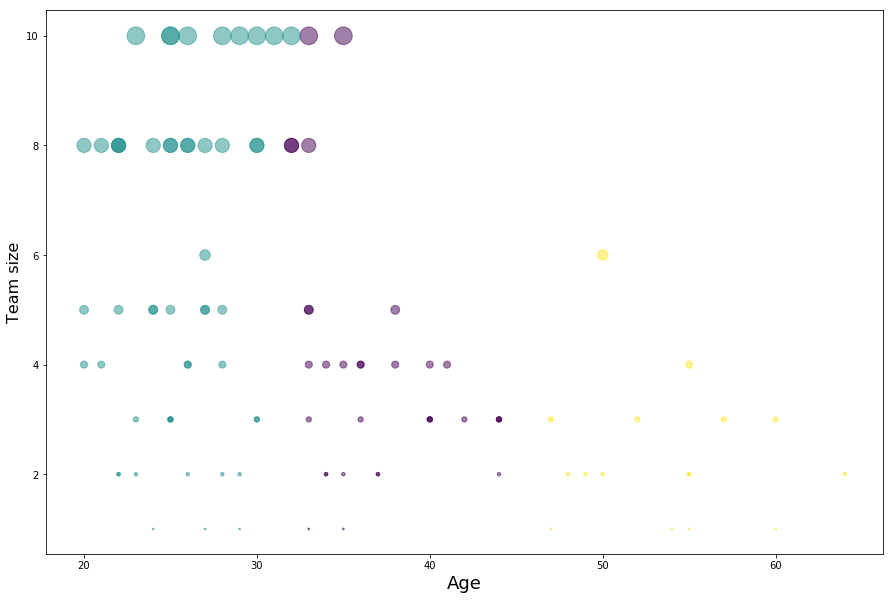

In [55]:
area = np.pi * (X[:, 1])**2  
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Team size', fontsize=16)

plt.show()

Now, let's look at the distribution of visitors based on their age and number of visits.

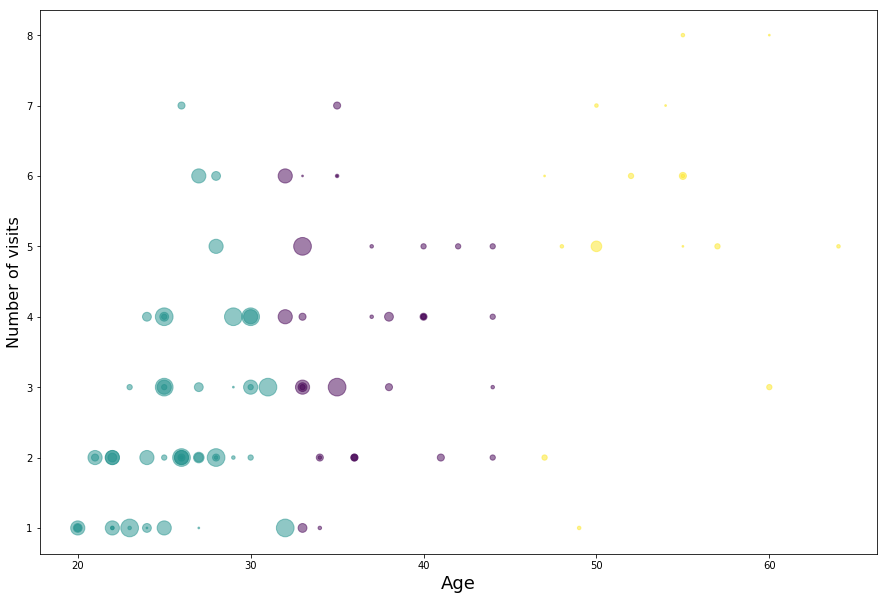

In [56]:
area = np.pi * (X[:, 1])**2  
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of visits', fontsize=16)

plt.show()

A profile for each group could be: 
- older, small team, frequent visitor, prefers English, then French, then Italian food
- young, large team, fewer visits, prefers English, then Italian, then Indian food
- middle aged, medium team, medium visits, prefers English, then Italian, then Indian food

Access Foursquare location data to search for Italian restaurants around Hursley

In [64]:
search_query = 'Italian'
radius = 15000
print(search_query + ' .... OK!')

Italian .... OK!


In [65]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=YQ1CCQFV2U3WYWT20S3TGHA1HAERMNSK5NN51QTXQS2SY1PX&client_secret=FAC1AZTSVJARFIF5PT0JUBSBJQMQHABXXRAWH1FPLF5VB1HU&ll=51.0268,-1.3973&v=20180604&query=Italian&radius=15000&limit=30'

In [66]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5bf00861dd57975cb09383c3'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'primary': True,
      'shortName': 'Italian'}],
    'hasPerk': False,
    'id': '4c4c85029c8d2d7f9fb98a6c',
    'location': {'address': 'Village Street',
     'cc': 'GB',
     'city': 'Chilbolton',
     'country': 'United Kingdom',
     'distance': 14866,
     'formattedAddress': ['Village Street',
      'Chilbolton',
      'Hampshire',
      'SO20 6BA',
      'United Kingdom'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.15768,
       'lng': -1.439571}],
     'lat': 51.15768,
     'lng': -1.439571,
     'postalCode': 'SO20 6BA',
     'state': 'Hampshire'},
    'name': 'Abbots Mitre Italian Restaurant & Pub',
    'referralId': 'v-1542457441

In [67]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'shortName': 'Italian', 'pluralName': 'Italian Restaurants', 'name': 'Italian Restaurant', 'id': '4bf58dd8d48988d110941735', 'primary': True}]",False,4c4c85029c8d2d7f9fb98a6c,Village Street,GB,Chilbolton,United Kingdom,NaN,14866,"[Village Street, Chilbolton, Hampshire, SO20 6BA, United Kingdom]","[{'label': 'display', 'lng': -1.439571, 'lat': 51.15768}]",51.157680,-1.439571,SO20 6BA,Hampshire,Abbots Mitre Italian Restaurant & Pub,v-1542457441
1,"[{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'shortName': 'Italian', 'pluralName': 'Italian Restaurants', 'name': 'Italian Restaurant', 'id': '4bf58dd8d48988d110941735', 'primary': True}]",False,4d557f409e508cfafade009b,Latimer St.,GB,Southampton,United Kingdom,Oxford St.,14389,"[Latimer St. (Oxford St.), Southampton, Hampshire, SO14 3BQ, United Kingdom]","[{'label': 'display', 'lng': -1.4007924997266352, 'lat': 50.89755698952178}]",50.897557,-1.400792,SO14 3BQ,Hampshire,Bellini's Italian Restaurant & Lounge Bar,v-1542457441
2,"[{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'shortName': 'Italian', 'pluralName': 'Italian Restaurants', 'name': 'Italian Restaurant', 'id': '4bf58dd8d48988d110941735', 'primary': True}]",False,4b780c33f964a52075b32ee3,101 High Street,GB,Winchester,United Kingdom,-,6977,"[101 High Street (-), Winchester, Hampshire, SO23 9AH, United Kingdom]","[{'label': 'display', 'lng': -1.3157479782438473, 'lat': 51.06285643386787}]",51.062856,-1.315748,SO23 9AH,Hampshire,ASK Italian,v-1542457441
3,"[{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_', 'suffix': '.png'}, 'shortName': 'Ice Cream', 'pluralName': 'Ice Cream Shops', 'name': 'Ice Cream Shop', 'id': '4bf58dd8d48988d1c9941735', 'primary': True}]",False,53eb8359498e7fd89bb63b4e,NaN,GB,Southampton,United Kingdom,NaN,13782,"[Southampton, Hampshire, United Kingdom]","[{'label': 'display', 'lng': -1.4032967190760195, 'lat': 50.90304968459886}]",50.903050,-1.403297,NaN,Hampshire,Italian Creams,v-1542457441
4,"[{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'shortName': 'Italian', 'pluralName': 'Italian Restaurants', 'name': 'Italian Restaurant', 'id': '4bf58dd8d48988d110941735', 'primary': True}]",False,518513c4498ee03b38df34b6,85-87 Queensway,GB,Southampton,United Kingdom,NaN,13873,"[85-87 Queensway, Southampton, Hampshire, SO14 3HJ, United Kingdom]","[{'label': 'display', 'lng': -1.4008783739775905, 'lat': 50.90219323186157}]",50.902193,-1.400878,SO14 3HJ,Hampshire,Casanova Italian Restaurant,v-1542457441


In [68]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Abbots Mitre Italian Restaurant & Pub,Italian Restaurant,Village Street,GB,Chilbolton,United Kingdom,NaN,14866,"[Village Street, Chilbolton, Hampshire, SO20 6BA, United Kingdom]","[{'label': 'display', 'lng': -1.439571, 'lat': 51.15768}]",51.157680,-1.439571,SO20 6BA,Hampshire,4c4c85029c8d2d7f9fb98a6c
1,Bellini's Italian Restaurant & Lounge Bar,Italian Restaurant,Latimer St.,GB,Southampton,United Kingdom,Oxford St.,14389,"[Latimer St. (Oxford St.), Southampton, Hampshire, SO14 3BQ, United Kingdom]","[{'label': 'display', 'lng': -1.4007924997266352, 'lat': 50.89755698952178}]",50.897557,-1.400792,SO14 3BQ,Hampshire,4d557f409e508cfafade009b
2,ASK Italian,Italian Restaurant,101 High Street,GB,Winchester,United Kingdom,-,6977,"[101 High Street (-), Winchester, Hampshire, SO23 9AH, United Kingdom]","[{'label': 'display', 'lng': -1.3157479782438473, 'lat': 51.06285643386787}]",51.062856,-1.315748,SO23 9AH,Hampshire,4b780c33f964a52075b32ee3
3,Italian Creams,Ice Cream Shop,NaN,GB,Southampton,United Kingdom,NaN,13782,"[Southampton, Hampshire, United Kingdom]","[{'label': 'display', 'lng': -1.4032967190760195, 'lat': 50.90304968459886}]",50.903050,-1.403297,NaN,Hampshire,53eb8359498e7fd89bb63b4e
4,Casanova Italian Restaurant,Italian Restaurant,85-87 Queensway,GB,Southampton,United Kingdom,NaN,13873,"[85-87 Queensway, Southampton, Hampshire, SO14 3HJ, United Kingdom]","[{'label': 'display', 'lng': -1.4008783739775905, 'lat': 50.90219323186157}]",50.902193,-1.400878,SO14 3HJ,Hampshire,518513c4498ee03b38df34b6
5,Reggina's Italian Restaurant,Italian Restaurant,15 Hight St.,GB,Botley,United Kingdom,NaN,15337,"[15 Hight St., Botley, Hampshire, SO30 2EA, United Kingdom]","[{'label': 'display', 'lng': -1.2708510042312444, 'lat': 50.91435736858317}]",50.914357,-1.270851,SO30 2EA,Hampshire,4bc3608b2a89ef3b9feef488
6,Tosca's Ristorante Italiano,Italian Restaurant,13-15 High St,GB,Southampton,United Kingdom,NaN,10015,"[13-15 High St, Southampton, Hampshire, SO30 2EA, United Kingdom]","[{'label': 'display', 'lng': -1.37948737, 'lat': 50.93753437}]",50.937534,-1.379487,SO30 2EA,Hampshire,4c1a1c7b834e2d7f00562b80
7,Ask,Italian Restaurant,Unit 3 Leisure World,GB,Southampton,United Kingdom,NaN,13923,"[Unit 3 Leisure World, Southampton, Hampshire, SO15 1RE, United Kingdom]","[{'label': 'display', 'lng': -1.4144300159141887, 'lat': 50.90219027217501}]",50.902190,-1.414430,SO15 1RE,Hampshire,4b93f423f964a520855c34e3


In [69]:
dataframe_filtered.name

0    Abbots Mitre Italian Restaurant & Pub    
1    Bellini's Italian Restaurant & Lounge Bar
2    ASK Italian                              
3    Italian Creams                           
4    Casanova Italian Restaurant              
5    Reggina's Italian Restaurant             
6    Tosca's Ristorante Italiano              
7    Ask                                      
Name: name, dtype: object

In [71]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around the Conrad Hotel

# add a red circle marker to represent IBM Hursley
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='blue',
    popup='IBM Hursley',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.6
).add_to(venues_map)

# add the venues as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Find the rating of the nearest Italian restaurant

In [78]:
venue_id = '4c4c85029c8d2d7f9fb98a6c' # ID of nearest
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4c4c85029c8d2d7f9fb98a6c?client_id=YQ1CCQFV2U3WYWT20S3TGHA1HAERMNSK5NN51QTXQS2SY1PX&client_secret=FAC1AZTSVJARFIF5PT0JUBSBJQMQHABXXRAWH1FPLF5VB1HU&v=20180604'

In [79]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['likes', 'hereNow', 'listed', 'inbox', 'stats', 'ratingSignals', 'allowMenuUrlEdit', 'price', 'bestPhoto', 'photos', 'name', 'location', 'ratingColor', 'id', 'verified', 'colors', 'timeZone', 'reasons', 'attributes', 'pageUpdates', 'shortUrl', 'categories', 'dislike', 'createdAt', 'contact', 'tips', 'canonicalUrl', 'rating', 'beenHere', 'specials', 'ok'])


{'allowMenuUrlEdit': True,
 'attributes': {'groups': [{'count': 1,
    'items': [{'displayName': 'Price', 'displayValue': '££', 'priceTier': 2}],
    'name': 'Price',
    'summary': '££',
    'type': 'price'}]},
 'beenHere': {'count': 0,
  'lastCheckinExpiredAt': 0,
  'marked': False,
  'unconfirmedCount': 0},
 'bestPhoto': {'createdAt': 1433676712,
  'height': 1920,
  'id': '55742ba8498ed1c91fe83169',
  'prefix': 'https://fastly.4sqi.net/img/general/',
  'source': {'name': 'Swarm for iOS', 'url': 'https://www.swarmapp.com'},
  'suffix': '/52205094_Q_H3juLI7tMVCT3-0esFjfr6fhdXAYOGV6e5kqHXv1Q.jpg',
  'visibility': 'public',
  'width': 1440},
 'canonicalUrl': 'https://foursquare.com/v/abbots-mitre-italian-restaurant--pub/4c4c85029c8d2d7f9fb98a6c',
 'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
    'suffix': '.png'},
   'id': '4bf58dd8d48988d110941735',
   'name': 'Italian Restaurant',
   'pluralName': 'Italian Restaurants',
   'primary': True,

In [80]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.4


Find the rating of the second nearest Italian restaurant

In [75]:
venue_id = '4d557f409e508cfafade009b' # ID of second nearest
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


Find the rating of the third nearest Italian restaurant

In [76]:
venue_id = '4b780c33f964a52075b32ee3' # ID of third nearest
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.0


Go back to the first restaurant Abbots Mitre as it is the highest rated of the nearest three

In [82]:
venue_id = '4c4c85029c8d2d7f9fb98a6c' # ID of nearest
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4c4c85029c8d2d7f9fb98a6c?client_id=YQ1CCQFV2U3WYWT20S3TGHA1HAERMNSK5NN51QTXQS2SY1PX&client_secret=FAC1AZTSVJARFIF5PT0JUBSBJQMQHABXXRAWH1FPLF5VB1HU&v=20180604'

In [83]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['likes', 'hereNow', 'listed', 'inbox', 'stats', 'ratingSignals', 'allowMenuUrlEdit', 'price', 'bestPhoto', 'photos', 'name', 'location', 'ratingColor', 'id', 'verified', 'colors', 'timeZone', 'reasons', 'attributes', 'pageUpdates', 'shortUrl', 'categories', 'dislike', 'createdAt', 'contact', 'tips', 'canonicalUrl', 'rating', 'beenHere', 'specials', 'ok'])


{'allowMenuUrlEdit': True,
 'attributes': {'groups': [{'count': 1,
    'items': [{'displayName': 'Price', 'displayValue': '££', 'priceTier': 2}],
    'name': 'Price',
    'summary': '££',
    'type': 'price'}]},
 'beenHere': {'count': 0,
  'lastCheckinExpiredAt': 0,
  'marked': False,
  'unconfirmedCount': 0},
 'bestPhoto': {'createdAt': 1433676712,
  'height': 1920,
  'id': '55742ba8498ed1c91fe83169',
  'prefix': 'https://fastly.4sqi.net/img/general/',
  'source': {'name': 'Swarm for iOS', 'url': 'https://www.swarmapp.com'},
  'suffix': '/52205094_Q_H3juLI7tMVCT3-0esFjfr6fhdXAYOGV6e5kqHXv1Q.jpg',
  'visibility': 'public',
  'width': 1440},
 'canonicalUrl': 'https://foursquare.com/v/abbots-mitre-italian-restaurant--pub/4c4c85029c8d2d7f9fb98a6c',
 'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
    'suffix': '.png'},
   'id': '4bf58dd8d48988d110941735',
   'name': 'Italian Restaurant',
   'pluralName': 'Italian Restaurants',
   'primary': True,

In [84]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

7.4


Examine the tips for the restaurant

In [85]:
result['response']['venue']['tips']['count']

5

In [93]:
## Tips
limit = 5 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5bf00c7fdd57975cc47169bf'},
 'response': {'tips': {'count': 5,
   'items': [{'agreeCount': 0,
     'authorInteractionType': 'liked',
     'canonicalUrl': 'https://foursquare.com/item/513483e9e4b0ef4e2192e882',
     'createdAt': 1362396137,
     'disagreeCount': 0,
     'id': '513483e9e4b0ef4e2192e882',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'photo': {'createdAt': 1362396140,
      'height': 960,
      'id': '513483ece4b021ede1e7fac2',
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'source': {'name': 'Foursquare for Android',
       'url': 'https://foursquare.com/download/#/android'},
      'suffix': '/4595468__dR3mbYiDjj_f_6jmKrf-BtsXoE48YSTDfdXgjG0BxQ.jpg',
      'visibility': 'public',
      'width': 720},
     'photourl': 'https://fastly.4sqi.net/img/general/original/4595468__dR3mbYiDjj_f_6jmKrf-BtsXoE48YSTDfdXgjG0BxQ.jpg',
     'text': 'You must try the linguine vongole. Excellent!'

In [94]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['likes', 'type', 'todo', 'disagreeCount', 'agreeCount', 'user', 'lang', 'createdAt', 'photourl', 'photo', 'canonicalUrl', 'logView', 'text', 'authorInteractionType', 'id'])

In [95]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,You must try the linguine vongole. Excellent!,0,0,513483e9e4b0ef4e2192e882,ASK Gwen,Cash,female,4595468


Explore hotels near Abbots Mitre restaurant

In [96]:
latitude = 51.15768
longitude = -1.439571
print(latitude, longitude)

51.15768 -1.439571


In [97]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=YQ1CCQFV2U3WYWT20S3TGHA1HAERMNSK5NN51QTXQS2SY1PX&client_secret=FAC1AZTSVJARFIF5PT0JUBSBJQMQHABXXRAWH1FPLF5VB1HU&ll=51.15768,-1.439571&v=20180604&radius=15000&limit=30'

In [98]:
import requests

In [100]:
results = requests.get(url).json()
'There are {} venues around Abbots Mitre.'.format(len(results['response']['groups'][0]['items']))

'There are 30 venues around Abbots Mitre.'

In [101]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'reasonName': 'globalInteractionReason',
    'summary': 'This spot is popular',
    'type': 'general'}]},
 'referralId': 'e-0-4c4c85029c8d2d7f9fb98a6c-0',
 'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d110941735',
    'name': 'Italian Restaurant',
    'pluralName': 'Italian Restaurants',
    'primary': True,
    'shortName': 'Italian'}],
  'id': '4c4c85029c8d2d7f9fb98a6c',
  'location': {'address': 'Village Street',
   'cc': 'GB',
   'city': 'Chilbolton',
   'country': 'United Kingdom',
   'distance': 0,
   'formattedAddress': ['Village Street',
    'Chilbolton',
    'Hampshire',
    'SO20 6BA',
    'United Kingdom'],
   'labeledLatLngs': [{'label': 'display', 'lat': 51.15768, 'lng': -1.439571}],
   'lat': 51.15768,
   'lng': -1.439571,
   'postalCode': 'SO20 6BA',
   'state': 'Hampshire'},
  'name': 'Abbots Mitre Italian Restaurant & Pub',
  'p

In [102]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Abbots Mitre Italian Restaurant & Pub,Italian Restaurant,Village Street,GB,Chilbolton,United Kingdom,NaN,0,"[Village Street, Chilbolton, Hampshire, SO20 6BA, United Kingdom]","[{'label': 'display', 'lng': -1.439571, 'lat': 51.15768}]",51.157680,-1.439571,SO20 6BA,Hampshire,4c4c85029c8d2d7f9fb98a6c
1,The Greyhound on the Test,Gastropub,31 High St,GB,Stockbridge,United Kingdom,NaN,6214,"[31 High St, Stockbridge, Hampshire, SO20 6EY, United Kingdom]","[{'label': 'display', 'lng': -1.495989101481161, 'lat': 51.11451882953786}]",51.114519,-1.495989,SO20 6EY,Hampshire,4c7ff78bdc018cfa5f4cb86c
2,Thyme and Tide,Café,NaN,GB,Stockbridge,United Kingdom,NaN,6109,"[Stockbridge, Hampshire, United Kingdom]","[{'label': 'display', 'lng': -1.4927346480712669, 'lat': 51.11409339993074}]",51.114093,-1.492735,NaN,Hampshire,4c7ccbc83e90a1cd2a6243be
3,Waitrose Farm Shop,Farmers Market,"Longstock Park Nursery, Leckford Estate",GB,Stockbridge,United Kingdom,NaN,2795,"[Longstock Park Nursery, Leckford Estate, Stockbridge, Hampshire, SO20 6EH, United Kingdom]","[{'label': 'display', 'lng': -1.4765365282632956, 'lat': 51.14803042890184}]",51.148030,-1.476537,SO20 6EH,Hampshire,521c936211d257cadb2ae15c
4,Hawk Conservancy Trust,Zoo,Sarson Lane,GB,Weyhill,United Kingdom,NaN,10196,"[Sarson Lane, Weyhill, Hampshire, SP11 8DY, United Kingdom]","[{'label': 'display', 'lng': -1.5617801919294114, 'lat': 51.207897656184734}]",51.207898,-1.561780,SP11 8DY,Hampshire,4bfa68e15ec320a1e78a8bd3
5,Wimpy,Burger Joint,77 High Street,GB,Andover,United Kingdom,NaN,6325,"[77 High Street, Andover, Hampshire, SP10 1LR, United Kingdom]","[{'label': 'display', 'lng': -1.4791892245368672, 'lat': 51.208788041085555}]",51.208788,-1.479189,SP10 1LR,Hampshire,4fdc8b11e4b09d541766bcf8
6,Lainston House Hotel Winchester,Hotel,Woodman Lane,GB,Winchester,United Kingdom,Sparsholt,9718,"[Woodman Lane (Sparsholt), Winchester, Hampshire, SO21 2LT, United Kingdom]","[{'label': 'display', 'lng': -1.3692593050434552, 'lat': 51.082350923801926}]",51.082351,-1.369259,SO21 2LT,Hampshire,4bc87b84dc55eee1bd7de8ac
7,The Plough Inn,Pub,NaN,GB,NaN,United Kingdom,NaN,9719,[United Kingdom],"[{'label': 'display', 'lng': -1.375683414954854, 'lat': 51.080119915913485}]",51.080120,-1.375683,NaN,NaN,4c251b89905a0f47b4ed6060
8,Great Hall & Round Table,History Museum,at Winchester Castle,GB,Winchester,United Kingdom,Castle Ave,13474,"[at Winchester Castle (Castle Ave), Winchester, Hampshire, SO23 8PJ, United Kingdom]","[{'label': 'display', 'lng': -1.3196399814620585, 'lat': 51.062908387554565}]",51.062908,-1.319640,SO23 8PJ,Hampshire,4bd2c95877b29c74885b8f82
9,The Peat Spade Inn,Gastropub,Village Street,GB,Longstock,United Kingdom,NaN,4343,"[Village Street, Longstock, Hampshire, SO20 6DR, United Kingdom]","[{'label': 'display', 'lng': -1.487123639193677, 'lat': 51.13252792765597}]",51.132528,-1.487124,SO20 6DR,Hampshire,4c44388d8c1f20a10b0c3c99


Search for hotels within 5km of the Abbots Mitre restaurant

In [124]:
search_query = 'hotel'
radius = 5000
print(search_query + ' .... OK!')

hotel .... OK!


In [125]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=YQ1CCQFV2U3WYWT20S3TGHA1HAERMNSK5NN51QTXQS2SY1PX&client_secret=FAC1AZTSVJARFIF5PT0JUBSBJQMQHABXXRAWH1FPLF5VB1HU&ll=51.15768,-1.439571&v=20180604&query=hotel&radius=5000&limit=30'

In [126]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5bf00fcd4c1f675b6c12a354'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'primary': True,
      'shortName': 'Hotel'}],
    'hasPerk': False,
    'id': '4dc29da1d4c07da169fbc2bd',
    'location': {'address': 'High Street',
     'cc': 'GB',
     'city': 'Stockbridge',
     'country': 'United Kingdom',
     'distance': 6089,
     'formattedAddress': ['High Street',
      'Stockbridge',
      'Hampshire',
      'SO20 6EU',
      'United Kingdom'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.114287620104804,
       'lng': -1.4926642604418399}],
     'lat': 51.114287620104804,
     'lng': -1.4926642604418399,
     'postalCode': 'SO20 6EU',
     'state': 'Hampshire'},
    'name': 'The Grosvenor Hotel',
    'referralId': 'v-1542459341'},
   {'ca

In [122]:
results['response']['venues']

[{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d1fa931735',
    'name': 'Hotel',
    'pluralName': 'Hotels',
    'primary': True,
    'shortName': 'Hotel'}],
  'hasPerk': False,
  'id': '4dc29da1d4c07da169fbc2bd',
  'location': {'address': 'High Street',
   'cc': 'GB',
   'city': 'Stockbridge',
   'country': 'United Kingdom',
   'distance': 6089,
   'formattedAddress': ['High Street',
    'Stockbridge',
    'Hampshire',
    'SO20 6EU',
    'United Kingdom'],
   'labeledLatLngs': [{'label': 'display',
     'lat': 51.114287620104804,
     'lng': -1.4926642604418399}],
   'lat': 51.114287620104804,
   'lng': -1.4926642604418399,
   'postalCode': 'SO20 6EU',
   'state': 'Hampshire'},
  'name': 'The Grosvenor Hotel',
  'referralId': 'v-1542459286'},
 {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d1fa9317

In [127]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'shortName': 'Hotel', 'pluralName': 'Hotels', 'name': 'Hotel', 'id': '4bf58dd8d48988d1fa931735', 'primary': True}]",False,4dc29da1d4c07da169fbc2bd,High Street,GB,Stockbridge,United Kingdom,6089,"[High Street, Stockbridge, Hampshire, SO20 6EU, United Kingdom]","[{'label': 'display', 'lng': -1.4926642604418399, 'lat': 51.114287620104804}]",51.114288,-1.492664,SO20 6EU,Hampshire,The Grosvenor Hotel,v-1542459341
1,"[{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_', 'suffix': '.png'}, 'shortName': 'Hotel', 'pluralName': 'Hotels', 'name': 'Hotel', 'id': '4bf58dd8d48988d1fa931735', 'primary': True}]",False,4dbc1fbafa8cee7273437d59,Leckford Lane,GB,NaN,United Kingdom,3271,"[Leckford Lane, SO2 0 6, United Kingdom]","[{'label': 'display', 'lng': -1.4685228890481874, 'lat': 51.13457969254051}]",51.134580,-1.468523,SO2 0 6,NaN,Leckford Abbas JLP Hotel,v-1542459341


In [128]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Grosvenor Hotel,Hotel,High Street,GB,Stockbridge,United Kingdom,6089,"[High Street, Stockbridge, Hampshire, SO20 6EU, United Kingdom]","[{'label': 'display', 'lng': -1.4926642604418399, 'lat': 51.114287620104804}]",51.114288,-1.492664,SO20 6EU,Hampshire,4dc29da1d4c07da169fbc2bd
1,Leckford Abbas JLP Hotel,Hotel,Leckford Lane,GB,NaN,United Kingdom,3271,"[Leckford Lane, SO2 0 6, United Kingdom]","[{'label': 'display', 'lng': -1.4685228890481874, 'lat': 51.13457969254051}]",51.134580,-1.468523,SO2 0 6,NaN,4dbc1fbafa8cee7273437d59


In [129]:
dataframe_filtered.name

0    The Grosvenor Hotel     
1    Leckford Abbas JLP Hotel
Name: name, dtype: object

In [131]:
hursley_latitude = 51.0268
hursley_longitude = -1.3973
print(hursley_latitude, hursley_longitude)

51.0268 -1.3973


In [133]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around IBM Hursley


# add Abbots Mitre as a green circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Abbots Mitre Italian restaurant',
    fill=True,
    color='green',
    fill_color='green',
    fill_opacity=0.6
    ).add_to(venues_map)

# add IBM Hursley as a blue circle mark
folium.features.CircleMarker(
    [hursley_latitude, hursley_longitude],
    radius=10,
    popup='IBM Hursley',
    fill=True,
    color='blue',
    fill_color='blue',
    fill_opacity=0.6
    ).add_to(venues_map)

# add popular spots to the map as red circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

Explore trending venues around Hursley

In [138]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, hursley_latitude, hursley_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=YQ1CCQFV2U3WYWT20S3TGHA1HAERMNSK5NN51QTXQS2SY1PX&client_secret=FAC1AZTSVJARFIF5PT0JUBSBJQMQHABXXRAWH1FPLF5VB1HU&ll=51.0268,-1.3973&v=20180604&radius=5000&limit=30'

In [139]:
import requests

In [141]:
results = requests.get(url).json()
'There are {} trending venues around IBM Hursley.'.format(len(results['response']['groups'][0]['items']))

'There are 22 trending venues around IBM Hursley.'

In [142]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'reasonName': 'globalInteractionReason',
    'summary': 'This spot is popular',
    'type': 'general'}]},
 'referralId': 'e-0-4c826a1451ada1cde0e61b10-0',
 'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d11b941735',
    'name': 'Pub',
    'pluralName': 'Pubs',
    'primary': True,
    'shortName': 'Pub'}],
  'id': '4c826a1451ada1cde0e61b10',
  'location': {'cc': 'GB',
   'city': 'Hursley',
   'country': 'United Kingdom',
   'crossStreet': 'Winchester Road',
   'distance': 481,
   'formattedAddress': ['Hursley', 'Hampshire', 'United Kingdom'],
   'labeledLatLngs': [{'label': 'display',
     'lat': 51.025623098512206,
     'lng': -1.3906847679478003}],
   'lat': 51.025623098512206,
   'lng': -1.3906847679478003,
   'state': 'Hampshire'},
  'name': 'The Kings Head',
  'photos': {'count': 0, 'groups': []}}}

In [143]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Kings Head,Pub,NaN,GB,Hursley,United Kingdom,Winchester Road,481,"[Hursley, Hampshire, United Kingdom]","[{'label': 'display', 'lng': -1.3906847679478003, 'lat': 51.025623098512206}]",51.025623,-1.390685,NaN,Hampshire,4c826a1451ada1cde0e61b10
1,The White Horse Otterbourne,Pub,Main Road,GB,Otterbourne,United Kingdom,NaN,4239,"[Main Road, Otterbourne, Hampshire, SO21 2EQ, United Kingdom]","[{'label': 'display', 'lng': -1.3486435265673489, 'lat': 51.0041401593444}]",51.004140,-1.348644,SO21 2EQ,Hampshire,4e10ae2c22713f7d7bca7d8c
2,Waitrose & Partners,Supermarket,1 Oakmount Road,GB,Eastleigh,United Kingdom,NaN,4697,"[1 Oakmount Road, Eastleigh, Hampshire, SO53 2LG, United Kingdom]","[{'label': 'display', 'lng': -1.3739915159271732, 'lat': 50.98723033929854}]",50.987230,-1.373992,SO53 2LG,Hampshire,4b52f090f964a520038b27e3
3,Hiltingbury Rec,Soccer Field,Hiltingbury Road,GB,Chandlers Ford,United Kingdom,NaN,3355,"[Hiltingbury Road, Chandlers Ford, Hampshire, SO53 5NP, United Kingdom]","[{'label': 'display', 'lng': -1.38543042129577, 'lat': 50.99760108566687}]",50.997601,-1.385430,SO53 5NP,Hampshire,51176700e4b034e6db096a7a
4,The Dolphin Inn,Bar,Hursley,GB,Winchester,United Kingdom,NaN,552,"[Hursley, Winchester, Hampshire, SO21 2JY, United Kingdom]","[{'label': 'display', 'lng': -1.39120606049378, 'lat': 51.0236514528362}]",51.023651,-1.391206,SO21 2JY,Hampshire,4c4979f5a3ace21e48b5a43b
5,The Old Forge,Gastropub,"Main Road, Otterbourne",GB,Otterbourne,United Kingdom,NaN,4345,"[Main Road, Otterbourne, Otterbourne, Hampshire, SO21 2EE, United Kingdom]","[{'label': 'display', 'lng': -1.3437409060470034, 'lat': 51.00709253769964}]",51.007093,-1.343741,SO21 2EE,Hampshire,4bcc90bf68f976b02fd56283
6,The Co-operative Food,Grocery Store,"105-111 Winchester Road, Chandlers Ford",GB,Eastleigh,United Kingdom,NaN,4601,"[105-111 Winchester Road, Chandlers Ford, Eastleigh, Hampshire, SO53 2GH, United Kingdom]","[{'label': 'display', 'lng': -1.3746842605121188, 'lat': 50.98798802971425}]",50.987988,-1.374684,SO53 2GH,Hampshire,504f65767e27022f969b5ede
7,Starbucks,Coffee Shop,1 Badger Farm Rd.,GB,Winchester,United Kingdom,NaN,4496,"[1 Badger Farm Rd., Winchester, Hampshire, SO22 4QB, United Kingdom]","[{'label': 'display', 'lng': -1.340964, 'lat': 51.046215}]",51.046215,-1.340964,SO22 4QB,Hampshire,4befd1113a002d7f6b6785a4
8,Cha Bar,Cafeteria,IBM,GB,Hursley,United Kingdom,NaN,64,"[IBM, Hursley, Hampshire, United Kingdom]","[{'label': 'display', 'lng': -1.3975911872108724, 'lat': 51.02624567496829}]",51.026246,-1.397591,NaN,Hampshire,4da429a8b3e7236a3f374079
9,Caffè Ritazza,Coffee Shop,IBM Hursley,GB,Hursley,United Kingdom,NaN,91,"[IBM Hursley, Hursley, Hampshire, SO15 1AL, United Kingdom]","[{'label': 'display', 'lng': -1.396259, 'lat': 51.026301}]",51.026301,-1.396259,SO15 1AL,Hampshire,4da30f577aee5481f5c3e1fe


In [150]:
venues_map = folium.Map(location=[hursley_latitude, hursley_longitude], zoom_start=12) # generate map centred around IBM Hursley


# add IBM Hursley as a red circle mark
folium.features.CircleMarker(
    [hursley_latitude, hursley_longitude],
    radius=10,
    popup='IBM Hursley',
    fill=True,
    color='blue',
    fill_color='blue',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map